In [54]:
%%capture
%pip install --user numpy pandas scikit-learn matplotlib;

### Importing packages

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
pd.set_option('float_format', '{:.2f}'.format)

### Loading data

In [56]:
X_columns = ['Number of pregnancies', 'Glucose', 'Blood Pressure', 'Skin thickness', 'Insulin', 'BMI', 'Inheritance', 'Age']
y_column = 'Has Diabetes'

# For all columns except 'Number of pregnanices' 0 indicates a missing value
na_values = {col: 0 for col in X_columns if col != 'Number of pregnancies'}
data = pd.read_csv('data.csv', names=[*X_columns, y_column], na_values=na_values)

# Dropping all missing values (for simplicity)
data = data.dropna()
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
display(data.head())
display(data.describe())

,Number of pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Inheritance,Age,Has Diabetes
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
6,3,78.00,50.00,32.00,88.00,31.00,0.25,26,1
8,2,197.00,70.00,45.00,543.00,30.50,0.16,53,1
13,1,189.00,60.00,23.00,846.00,30.10,0.40,59,1


,Number of pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Inheritance,Age,Has Diabetes
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,3.30,122.63,70.66,29.15,156.06,33.09,0.52,30.86,0.33
std,3.21,30.86,12.50,10.52,118.84,7.03,0.35,10.20,0.47
min,0.00,56.00,24.00,7.00,14.00,18.20,0.09,21.00,0.00
25%,1.00,99.00,62.00,21.00,76.75,28.40,0.27,23.00,0.00
50%,2.00,119.00,70.00,29.00,125.50,33.20,0.45,27.00,0.00
75%,5.00,143.00,78.00,37.00,190.00,37.10,0.69,36.00,1.00
max,17.00,198.00,110.00,63.00,846.00,67.10,2.42,81.00,1.00


### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

X_scaled = MinMaxScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

### Niave Bayes

In [59]:
from sklearn.naive_bayes import CategoricalNB

def transform_to_bins(col):
    percentiles = [25, 50, 75]
    boundaries = np.percentile(col, percentiles)
    return np.digitize(col, boundaries, right=True)

In [60]:
X_nb = X.copy(deep = True)

for column in X_columns:
    col = np.array(X_nb[column])
    X_nb[column] = transform_to_bins(col)

X_nb.describe()

,Number of pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Inheritance,Age
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,1.30,1.48,1.47,1.45,1.50,1.48,1.49,1.46
std,1.19,1.13,1.12,1.10,1.12,1.12,1.11,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.75,0.00,0.75,0.00
50%,1.00,1.00,1.00,1.00,1.50,1.00,1.50,1.00
75%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
max,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00


In [61]:
X_nb_train, X_nb_test, _, _ = train_test_split(X_nb, y, test_size=0.2)

In [62]:
nb_model = CategoricalNB(force_alpha=True, min_categories=4)
nb_model.fit(X_nb_train, y_train)
y_pred_naive_bayes = nb_model.predict(X_nb_test)

### Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

## Evaluation of models

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

def display_model_evaluation(y_true, y_pred, model_name=""):
    print (f'Accuracy score is {accuracy_score(y_test, y_pred)}')
    print (f'F1 score is {f1_score(y_test, y_pred)}')
    print ('Confusion Matrix')
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

### KNN

Accuracy score is 0.6835443037974683
F1 score is 0.5614035087719298
Confusion Matrix


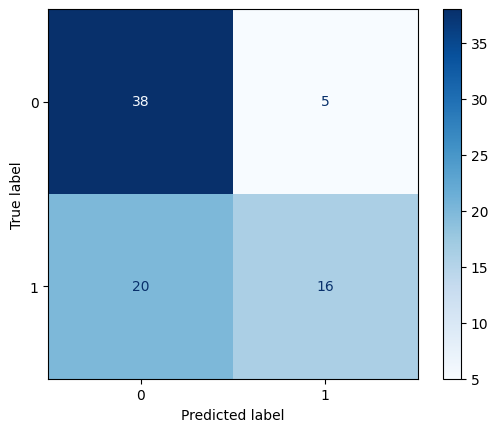

In [65]:
display_model_evaluation(y_test, y_pred_knn)

### Naive Bayes

Accuracy score is 0.569620253164557
F1 score is 0.15
Confusion Matrix


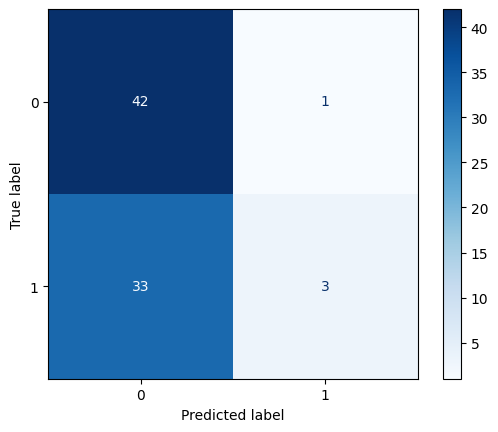

In [66]:
display_model_evaluation(y_test, y_pred_naive_bayes)

### Logistic regression

Accuracy score is 0.7215189873417721
F1 score is 0.6333333333333333
Confusion Matrix


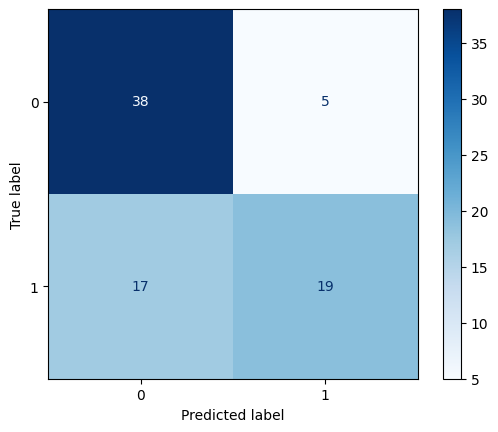

In [67]:
display_model_evaluation(y_test, y_pred_logreg)